In [1]:
# granting access to csv file

from google.colab import drive
drive.mount('/content/drive')
csv_path = '/content/drive/MyDrive/SaMD/diseaseProbs.csv'

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# loading data

import pandas as pd

# probability lookup table
prob_df = pd.read_csv(csv_path, delimiter=';')
print(prob_df)


          disease  fever  respiratory_symptoms  sneeze  cough  runny_nose  \
0        covid-19   1.00                  1.00    0.00   1.00        0.00   
1             flu   0.75                  0.75    1.00   0.75        1.00   
2     common_cold   0.50                  0.75    0.75   0.75        0.75   
3      bronchitis   0.50                  0.75    0.00   0.75        0.00   
4             RSV   0.50                  0.75    0.00   0.75        0.75   
5  pollen_allergy   0.25                  0.25    0.50   0.25        0.25   
6       sinusitis   0.50                  0.75    0.00   0.50        0.75   
7       hay_fever   0.50                  0.75    1.00   0.75        1.00   

   muscle_aches  headache  fatigue  diarrhea  vomiting  chest_pain  \
0          0.75      1.00     0.75      0.75      0.75        0.75   
1          1.00      0.75     1.00      1.00      1.00        0.00   
2          0.00      0.50     0.00      0.00      0.00        0.00   
3          0.00      0.00 

In [ ]:
# Generating synthetic dataset of n samples

import numpy as np

def generate_synthetic_data(prob_df, n_samples=1000):
    data = []
    diseases = prob_df['disease'].tolist()
    symptoms = prob_df.columns[1:].tolist()

    for _ in range(n_samples):
        disease = np.random.choice(diseases)
        symptom_probs = prob_df[prob_df['disease'] == disease].iloc[0, 1:].tolist()
        symptoms_present = [np.random.rand() < prob for prob in symptom_probs]
        data.append(symptoms_present + [disease])

    return pd.DataFrame(data, columns=symptoms + ['disease'])

df = generate_synthetic_data(prob_df, n_samples=1000)
print(df.head())


   fever  respiratory_symptoms  sneeze  cough  runny_nose  muscle_aches  \
0  False                  True   False  False        True         False   
1  False                  True   False  False       False         False   
2   True                  True    True   True        True          True   
3   True                  True   False   True       False         False   
4   True                  True   False   True        True         False   

   headache  fatigue  diarrhea  vomiting  chest_pain  stomachache  \
0     False    False     False     False       False        False   
1     False    False     False     False       False        False   
2      True     True      True      True       False        False   
3     False    False     False     False        True        False   
4     False    False     False     False       False        False   

   sore_throat  itchy_eyes  loss_of_appetite  loss_of_sense_of_smell  \
0        False       False              True                  

Accuracy: 0.78


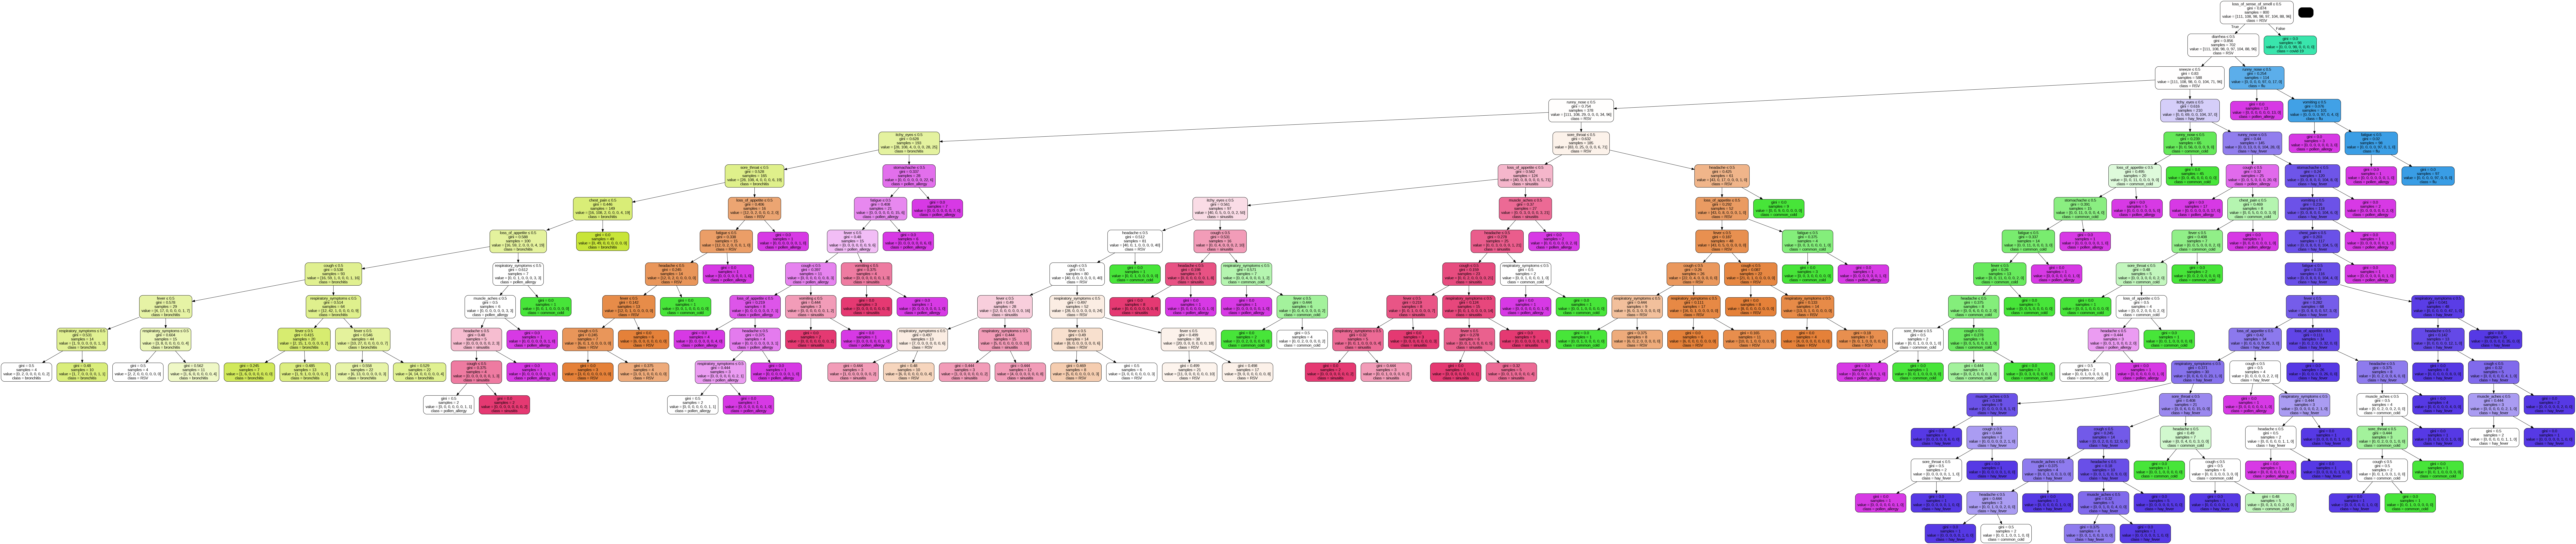

In [ ]:
# training and visualizing the decision tree

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
import pydotplus
from IPython.display import Image

# Prepare the data
X = df.drop(columns=['disease'])
y = df['disease']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=clf.classes_,
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# opt. save the tree visualization to file
# graph.write_png("decision_tree.png")

In [ ]:
# using the decision tree

# Example symptoms: [fever, sneeze, cough, runny nose, muscle_ache, fatigue, itchy_eyes]
# 1 means symptom is present, 0 means symptom is absent
example_symptoms = [1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]

# Convert the example symptoms to a DataFrame
example_df = pd.DataFrame([example_symptoms], columns=X.columns)

# Predict the disease
predicted_disease = clf.predict(example_df)
print(f'The predicted disease is: {predicted_disease[0]}')

The predicted disease is: covid-19
